In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
#import stephane.display.graphes as graphes
#import stephane.tools.Smath as smath

import icewave.display.graphes as graphes
import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rwphone
import icewave.tools.rw_data as rw

import icewave.field.multi_instruments as multi

import phonefleet.connect as connect

macOS
laita.pmmh-local.espci.fr
Please install garmin package


In [5]:

base = '/Volumes/Fabien_2024/Telephones/Tsync/'
acq = 'accelerometer2025-09-17_08-48-34/'

folder = base + acq#f'/Data/{date}/Phone/{phone}/'

savefolder = base+'Results/'
filelist = glob.glob(folder+'*')
pprint(filelist)

['/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P10_D-2025-09-17T14_46_06-android.sensor.accelerometer-1-15616143851--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P11_D-2025-09-17T14_46_13-android.sensor.accelerometer-1-15620302605--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P12_D-2025-09-17T14_46_28-android.sensor.accelerometer-1-15625758774--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P13_D-2025-09-17T14_45_31-android.sensor.accelerometer-1-15627757403--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P14_D-2025-09-17T14_46_22-android.sensor.accelerometer-1-13975803893--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P15_D-2025-09-17T14_46_16-android.sensor.accelerometer-1-15636395571--1.csv',
 '/Volumes/Fabien_2024/Telephones/Tsync/accelerometer2025-09-17_08-48-34/P16_D-2025-09-17T14_4

In [6]:
datas = {}

for filename in filelist:
    key = int(filename.split('/')[-1][1:3])
    print(key)
    raw = rw.read_csv(filename,delimiter=',')
    data = {}
    t = np.asarray(raw)[:,0].astype(int)
    t = t/10**6
    indices = t>0
    print(np.sum(indices))
    data['t'] = t[indices]
    data['ax'] = np.asarray(raw)[indices,1].astype(float)
    data['ay'] = np.asarray(raw)[indices,2].astype(float)
    data['az'] = np.asarray(raw)[indices,3].astype(float)
    
    datas[key] = data

10
37062
11
36856
12
36766
13
36474
14
36382
15
36302
16
36166
17
36464
18
36614
19
36874
20
36852
21
36428
22
36228
23
36353
24
36420
25
36208
26
36058
27
36098
28
35784
29
35526
30
35112
31
34928


In [17]:
datas[13]

['1866623271', ' 0.279', ' 0.22200002', ' 9.807', ' ']

In [60]:
np.sum(t>0)

np.int64(63676)

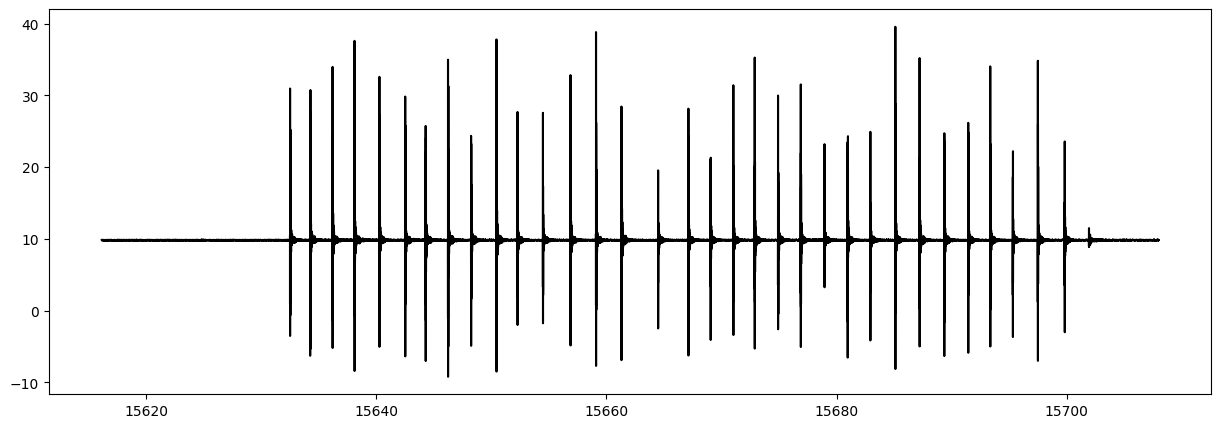

In [7]:
fig, ax = plt.subplots(figsize = (15,5))

phone = 10
t = datas[phone]['t']
az = datas[phone]['az']
ax.plot(t,az,'k')
#ax.set_xlim(31.5,32.5)

In [8]:
import scipy.signal as sig


def get_max(az,prom=1):
    indices,peaks = sig.find_peaks(az,prominence=prom)
    i0 = np.argmax(peaks['prominences'])
    imax = indices[i0]
    valmax = az[imax]
    return valmax,imax

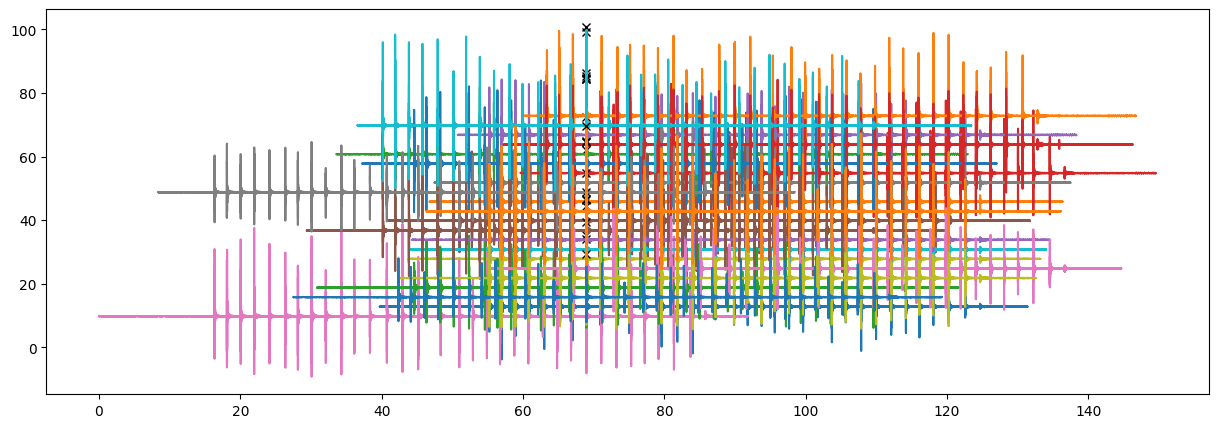

In [10]:
fig, ax = plt.subplots(figsize = (15,5))

results = {}

phoneref = 10
#careful need to set imax variable first
Dt = -datas[phoneref]['t'][0]+datas[phoneref]['tmax']
#Dt = 0

for phone in datas.keys():
    shift = (phone-phoneref)*3
    t = datas[phone]['t']
    az = datas[phone]['az']

    valmax,imax = get_max(az)
    tc = t-t[imax]+Dt
    
    datas[phone]['tmax']=t[imax]
    datas[phone]['imax']=imax
    datas[phone]['tmeca']=tc#synchonise time stamps using the mechanical method t=0 corresponds the first data point of #10 phone 
    #print(t[imax])
    ax.plot(tc,az+shift)
    ax.plot(Dt,valmax+shift,'kx')
    #ax.set_xlim(-0.03,0.15)
    #results[phone]= 

In [9]:
timefolder = base+'Tsync/'
filename = timefolder +'tsync_1758112854.txt'

synctable = rw.read_csv(filename,delimiter=',')
synctable = rw.csv2dict(synctable)

#print(synctable)
timetable = {}
phonelist = []
#t0 = synctable['0_0']['t0']
for key in synctable.keys():
    timetable[int(key)]=synctable[key]['tlag']
    
pprint(timetable)

{10: 1758097564.5895574,
 11: 1758097561.286919,
 12: 1758097556.4656155,
 13: 1758097555.619009,
 14: 1758099208.4830613,
 15: 1758097548.7814355,
 16: 1758097541.5267,
 17: 1758097541.2954247,
 18: 1747911904.440907,
 19: 1758097495.1193972,
 20: 1751278090.4576492,
 21: 1750949750.208428,
 22: 1749735792.388175,
 23: 1747911845.0387158,
 24: 1750949786.1333961,
 25: 1751375661.0570693,
 26: 1750949814.5105255,
 27: 1750949821.718193,
 28: 1750949826.7516232,
 29: 1750949831.7997398,
 30: 1751461736.4373684,
 31: 1751551214.975935}


In [59]:
1751551248/55/365/24/3600

1.009842285872423

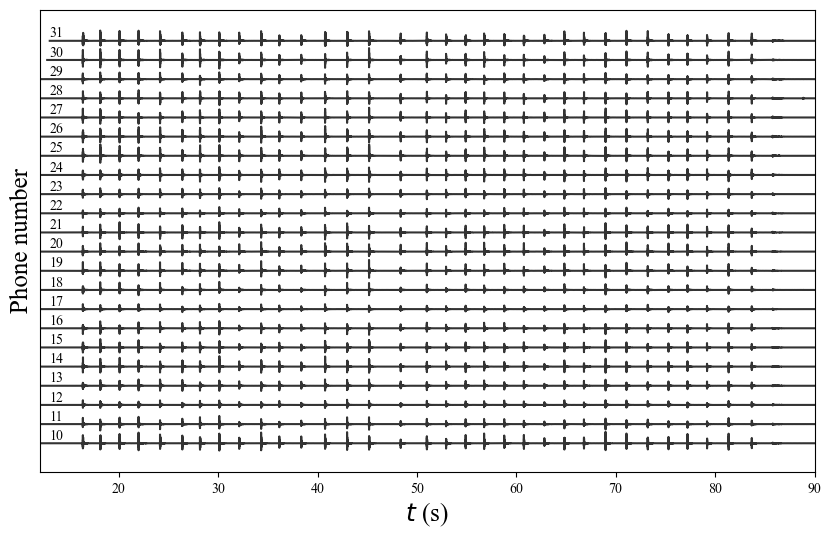

In [18]:
fig, ax = plt.subplots(figsize = (10,6))

phoneref = 10
t0 = datas[phoneref]['t'][0]+timetable[phoneref]
for phone in datas.keys():
    shift = (phone-phoneref)*50
    t = datas[phone]['t']
    az = datas[phone]['az']

    valmax,imax = get_max(az)
    tr = t+timetable[phone]-t0
    if phone == 32:
        color='r'
    else:
        color='k'
        
    datas[phone]['tinfo']=tr#synchonise time stamps using the mechanical method t=0 corresponds the first data point of #10 phone 

    ax.plot(tr,az+shift,color,alpha=0.8)
    
#    ax.plot(0,valmax+shift,'kx')
    #ax.set_xlim(33.1,33.2)
    tt = 13
    #ax.set_xlim(48.7,48.85)
    ax.text(tt,shift+9.81+10,phone,color=color)
    
    ax.set_xlim(12,90)

ax.set_yticks([])
figs = graphes.legende('$t$ (s)','Phone number','')
graphes.save_figs(figs,savedir=savefolder)

In [55]:
data['tinfo']

array([ 8.91056538e+00,  8.91304636e+00,  8.91552830e+00, ...,
       -6.72822362e+06, -6.72822362e+06, -6.72822362e+06], shape=(360000,))

In [72]:
for phone in datas.keys():
    data = datas[phone]
    print(data['tinfo'][0],data['tinfo'][-1])

11.917976140975952 167.86069226264954
4.724148988723755 164.42087292671204
6.773780822753906 165.18119168281555
5.535305500030518 164.60408353805542
2.312147378921509 163.28934836387634
7.103537559509277 165.3950436115265
10.608057737350464 166.863689661026
0.0 161.76831889152527
0.7895560264587402 162.23465991020203
8.790637493133545 166.0079333782196
1.1353788375854492 162.35727381706238
3.33655047416687 163.60321354866028
6.163822650909424 164.81021165847778
8.162951946258545 165.92011189460754
4.2657153606414795 164.23319840431213
1.7700483798980713 163.0156123638153
10.132169961929321 166.73524808883667
10.826404809951782 167.54029369354248
11.67519211769104 167.69812202453613
9.734389543533325 166.5420925617218
7.606937646865845 165.50148367881775
9.900577306747437 166.6357262134552
8.910565376281738 166.3889513015747


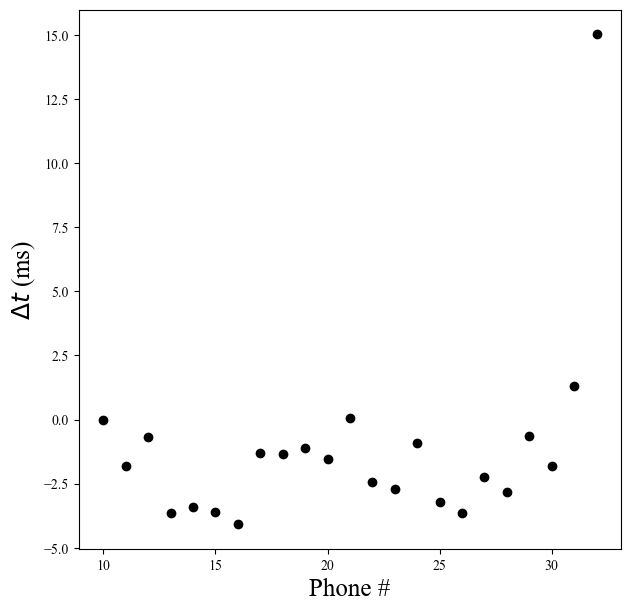

In [46]:
fig, ax = plt.subplots(figsize = (7,7))

for phone in datas.keys():
    #ax.plot(datas[phone]['tinfo'][0],datas[phone]['tmeca'][0],'ko')
    ax.plot(phone,(datas[phone]['tinfo'][0]-datas[phone]['tmeca'][0])*10**3,'ko')
figs = graphes.legende('Phone #',r'$\Delta t$ (ms)','')

In [20]:
import scipy.interpolate as interp

tmin = 15
tmax = 85

dt = 1/10000
ti = np.arange(tmin,tmax,dt)
print(len(ti))


for phone in datas.keys():
    t = datas[phone]['tinfo']
    y = datas[phone]['az']
    fi = interp.interp1d(t,y)
    datas[phone]['fi']=fi
    datas[phone]['azi']=fi(ti)

700000


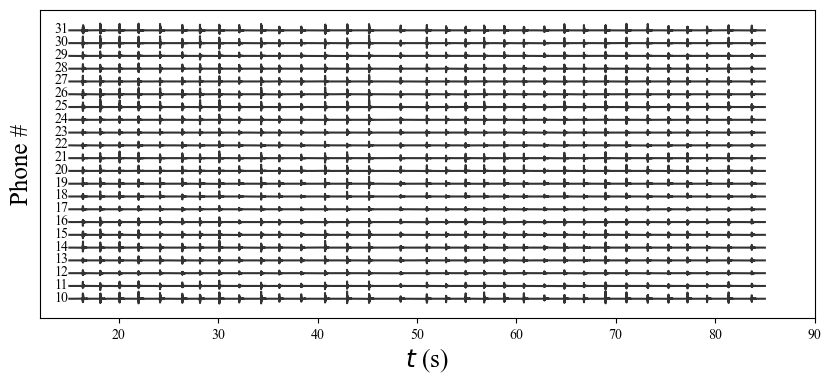

In [21]:
fig, ax = plt.subplots(figsize = (10,4))

n = len(datas.keys())
nt = len(ti)
M = np.zeros((n,nt))

for phone in datas.keys():
    shift = (phone-phoneref)*50
    az = datas[phone]['azi']

    ax.plot(ti,az+shift,color,alpha=0.8)
    if phone<32:
        M[phone-10,:]=az
#    ax.plot(0,valmax+shift,'kx')
    #ax.set_xlim(33.1,33.2)
    tt = 13.5
    #ax.set_xlim(48.7,48.85)
    ax.text(tt,shift,phone,color=color)    
    ax.set_xlim(12,90)
ax.set_yticks([])    
figs = graphes.legende('$t$ (s)','Phone #','')

graphes.save_figs(figs,savedir=savefolder,overwrite=True)

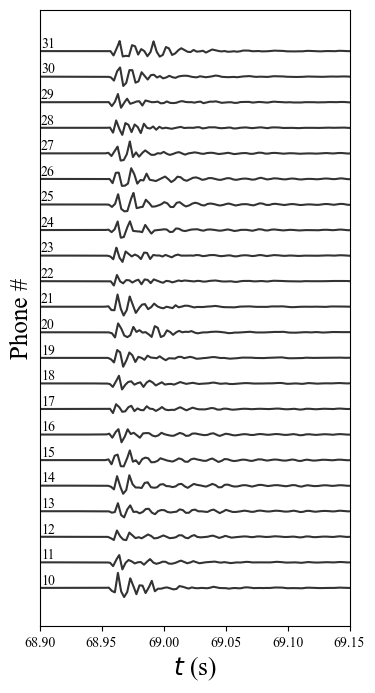

In [22]:
fig, ax = plt.subplots(figsize = (4,8))

n = len(datas.keys())
nt = len(ti)
M = np.zeros((n,nt))

for phone in datas.keys():
    shift = (phone-phoneref)*50
    az = datas[phone]['azi']

    ax.plot(ti,az+shift,color,alpha=0.8)
    if phone<32:
        M[phone-10,:]=az
#    ax.plot(0,valmax+shift,'kx')
    #ax.set_xlim(33.1,33.2)
    tmin = 68.9#,69.2
    ax.set_xlim(tmin,69.15)
    tt = tmin+0.0012
    #ax.set_xlim(48.7,48.85)
    ax.text(tt,shift+17,phone,color=color)    

ax.set_yticks([])    
figs = graphes.legende('$t$ (s)','Phone #','')

graphes.save_figs(figs,savedir=savefolder,overwrite=True,prefix='zoom_')

In [23]:
nt/16

21875.0

In [26]:
M.shape
n0 = 32
nphone = 22
Mtab = np.reshape(M,(nphone,n0,int(nt/n0)))

In [27]:
Mtab.shape

(22, 32, 21875)

[[1.3607 0.9426 0.6781 0.4012 0.3746 0.4298 1.9622 1.7796 1.7977 1.4418
  1.4626 1.6692 1.6999 1.7228 0.031  0.5347 0.9792 0.7321 0.5097 0.1783
  1.9954 1.8698 1.7021 1.4798 1.4632 1.3822 1.3483 1.2351 0.9607 0.7482
  0.7241 0.871 ]
 [1.3595 0.9175 0.677  0.4017 0.3749 0.4303 1.9627 1.7793 1.7973 1.4423
  1.4629 1.6676 1.7005 1.7211 0.1005 0.5339 0.9797 0.7243 0.5087 0.1787
  0.0175 1.8703 1.6943 1.4786 1.4642 1.3828 1.3387 1.2349 0.9594 0.7386
  0.7243 0.8718]
 [1.3601 0.9168 0.678  0.4019 0.3728 0.4287 1.9617 1.7804 1.7986 1.4402
  1.461  1.6689 1.6997 1.7206 0.0496 0.532  0.9795 0.7232 0.5094 0.1783
  0.0169 1.8694 1.6931 1.4792 1.4624 1.3808 1.3391 1.2351 0.959  0.7376
  0.7234 0.8716]
 [1.3585 0.9273 0.6879 0.4013 0.3733 0.43   1.962  1.7798 1.8066 1.4403
  1.4621 1.6679 1.6995 1.7213 0.0388 0.5334 0.9806 0.7238 0.5092 0.1776
  1.9957 1.8683 1.6935 1.4788 1.4632 1.3805 1.34   1.235  0.9607 0.7388
  0.7233 0.8721]
 [1.3708 0.9272 0.687  0.412  0.3849 0.4395 1.973  1.7798 1.8069 1.4

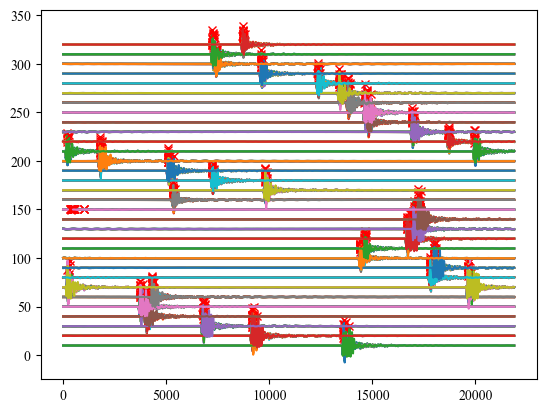

In [28]:
Dts = np.zeros((nphone,n0))
for j in range(nphone):
    for i in range(n0):
        shift = i*10
        y = Mtab[j,i,:]
        plt.plot(y+shift)
        val,imax = get_max(y,prom=0.1)

        plt.plot(imax,val+shift,'rx')
        
        Dts[j,i]=ti[imax]-ti[0]
print(Dts)

In [30]:
Dts.shape

(22, 32)

In [31]:
Dts[1,:]-Dts[0,:]

array([-1.2000e-03, -2.5100e-02, -1.1000e-03,  5.0000e-04,  3.0000e-04,
        5.0000e-04,  5.0000e-04, -3.0000e-04, -4.0000e-04,  5.0000e-04,
        3.0000e-04, -1.6000e-03,  6.0000e-04, -1.7000e-03,  6.9500e-02,
       -8.0000e-04,  5.0000e-04, -7.8000e-03, -1.0000e-03,  4.0000e-04,
       -1.9779e+00,  5.0000e-04, -7.8000e-03, -1.2000e-03,  1.0000e-03,
        6.0000e-04, -9.6000e-03, -2.0000e-04, -1.3000e-03, -9.6000e-03,
        2.0000e-04,  8.0000e-04])

[1.36362273 0.92030909 0.68003636 0.40444091 0.37591818 0.43122727
 1.52433182 1.78001818 1.80037273 1.44158182 1.46365455 1.67243182
 1.7055     1.72471818 0.05254545 0.53383636 0.98092727 0.72437727
 0.51183182 0.17958636 1.09806364 1.86967273 1.69511818 1.47997727
 1.46716818 1.38250455 1.34148636 1.23690455 0.96179545 0.74132727
 0.72623182 0.87223182]
(22, 30)
[    0.           183.33333333 -1990.         -1223.33333333
  1573.33333333 -1403.33333333 -1663.33333333 -2196.66666666
 -1343.33333333 -1146.66666666  -520.            43.33333333
   426.66666667   820.          -550.          5256.66666665
  5483.33333332   513.33333333  3189.99999999  -890.
   140.          3549.99999999]
[    0.         13883.3253301   6535.00063758  5003.31112586
  7145.62492406  6015.11891448  6548.66313752  6555.9887804
  6717.3746525   6834.55598816  6964.02182649  7840.94736338
 13949.40699652 14139.95285232  6130.89172414  6788.45506887
  8754.27831912  6767.01476936  7297.13870864  7580.38477474

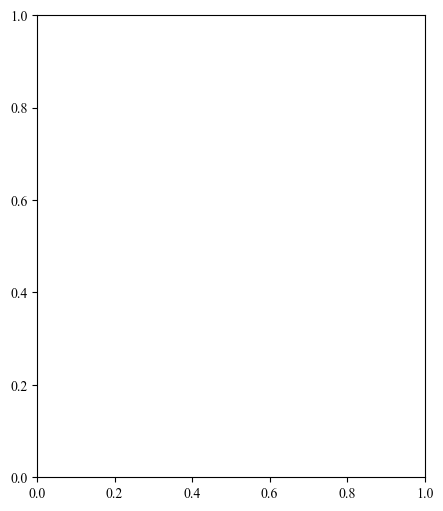

In [29]:
fig, ax = plt.subplots(figsize = (5,6))#,nrows=22,sharex=True)
Dts = np.asarray(Dts)
print(np.mean(Dts,axis=0))
err = np.round(np.std(Dts,axis=0),decimals=9)
good = err<0.05

err_rel = (Dts[:,good]-Dts[0,good])*1000
#print(err_rel*10**3)
print(err_rel.shape)

print(np.mean(err_rel*10**3,axis=1))
print(np.std(err_rel*10**3,axis=1))

In [30]:
err_rel.shape

(22, 30)

In [31]:

i0 = 11
for i0 in range(1,22):
#    print(err_rel[i0,:])
    moy = np.round(np.mean(err_rel[i0,:]),decimals=3)
    interval = np.round(np.std(err_rel[i0,:])/np.sqrt(30-1),decimals=3)
    print(moy,interval)

0.183 2.578
-1.99 1.214
-1.223 0.929
1.573 1.327
-1.403 1.117
-1.663 1.216
-2.197 1.217
-1.343 1.247
-1.147 1.269
-0.52 1.293
0.043 1.456
0.427 2.59
0.82 2.626
-0.55 1.138
5.257 1.261
5.483 1.626
0.513 1.257
3.19 1.355
-0.89 1.408
0.14 1.367
3.55 2.32


(-10.0, 10.0)

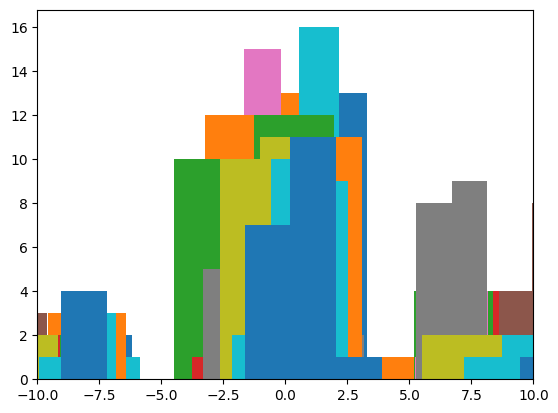

In [55]:
for i0 in range(1,22):
    plt.hist(err_rel[i0,:],30)
plt.xlim([-10,10])

In [34]:
dt = np.mean(np.diff(data['tinfo']))*1000
print(dt)

2.48256354818405


24
24
22
13
20
21
24
24
24
24
21
23
22
22
13
7
16
10
21
21
19


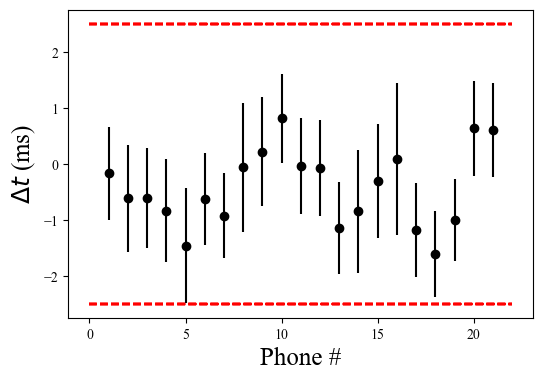

In [43]:
fig, ax = plt.subplots(figsize = (6,4))#,nrows=22,sharex=True)

moys = []
nphone = 22
for i0 in range(1,nphone):
    verygood = np.abs(err_rel[i0,:])<5
    nsample = np.sum(verygood)
    print(nsample)
    moy = np.round(np.mean(err_rel[i0,verygood]),decimals=3)
    interval = np.round(np.std(err_rel[i0,verygood]),decimals=3)
    ax.errorbar(i0,moy,interval,marker='o',color='k')
    
    moys.append(moy)
    
    xticks = [0,5,10,15,20]
    ax.set_xticks(xticks,[str(xtick) for xtick in xticks])
    ax.plot([0,22],[2.5,2.5],'r--')
    ax.plot([0,22],[-2.5,-2.5],'r--')
    
figs = graphes.legende('Phone #',r'$\Delta t$ (ms)','')

graphes.save_figs(figs,savedir=savefolder,overwrite=True)

In [59]:
print(np.mean(moys),np.std(moys))

-0.43842857142857145 0.6713515558666904


(array([4., 4., 5., 5., 3.]),
 array([-1.61  , -1.1264, -0.6428, -0.1592,  0.3244,  0.808 ]),
 <BarContainer object of 5 artists>)

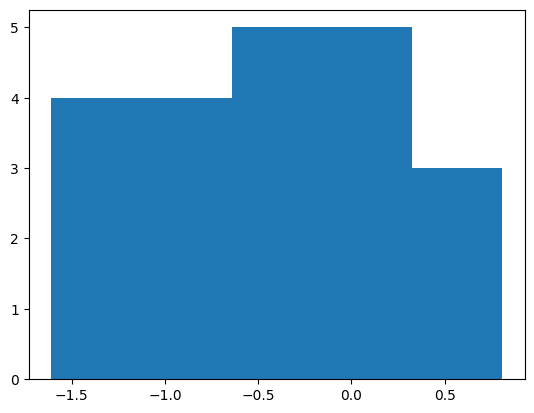

In [61]:
plt.hist(moys,5)

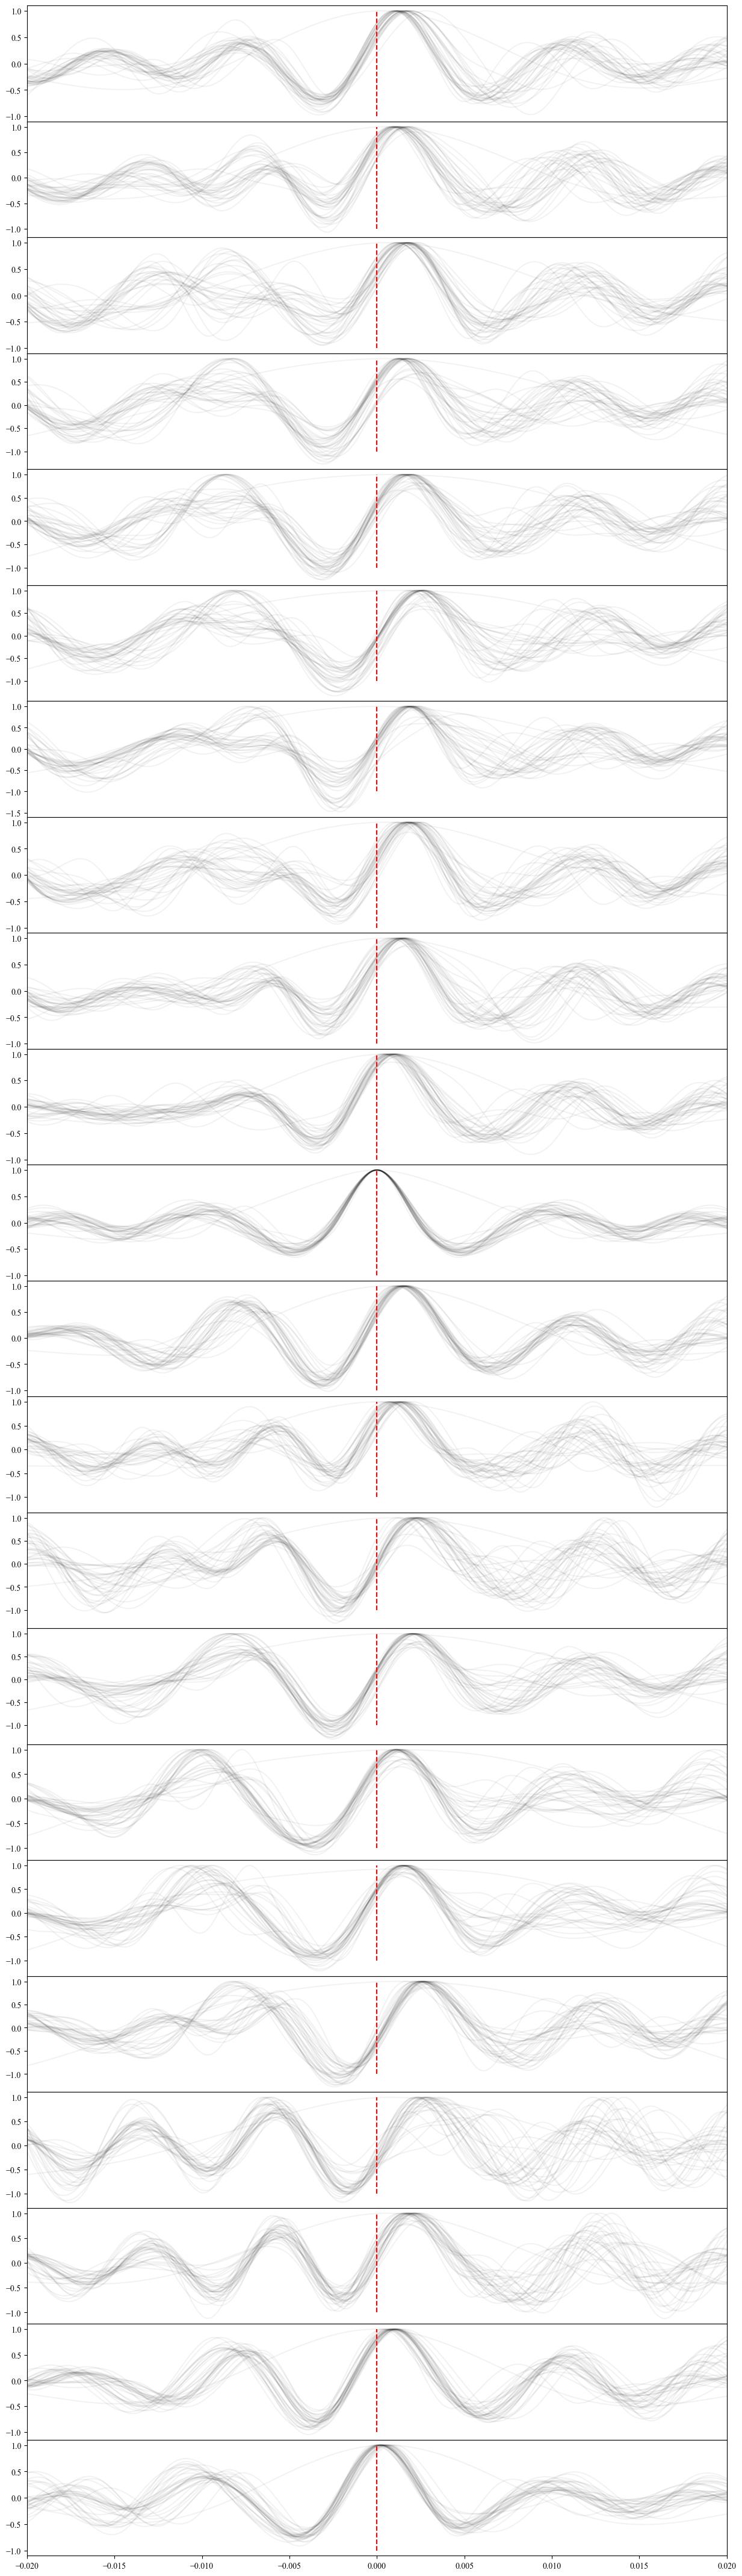

In [44]:
fig, axs = plt.subplots(figsize = (15,2.5*22),nrows=22,sharex=True)

tlag = ti[:int(nt/n0)*2-1]
tlag = tlag-np.mean(tlag)

for j in range(nphone):
    ax = axs[j]
    for i in range(n0):
        yref = Mtab[10,i,:]
        y1 = Mtab[j,i,:]
        yref = yref-np.mean(yref)
        y1 = y1-np.mean(y1)
        C = sig.correlate(yref,y1)#,method='same')
        C = C/np.max(C)
        ax.plot(tlag*10**3,C,'k',alpha=0.05)
    ax.plot([0,0],[-1,1],'r--')
    ax.set_xlim(-20,20)
    
fig.subplots_adjust(hspace=0)

    

In [8]:
filename = '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/Tsync/tsync_1738419342'



['phone', 'iter', 'tlag', 'dtmedian', 'tmin', 'tmax', 'tstd', 'n', 't0']
['0_0', '0', '0', '1738418902.17872', '0.0017045665000000002', '1738418902.178598', '1738418902.1789145', '8.235415340473988e-05', '50', '1738419211.7666726']
['2_0', '2', '0', '1737121520.0597029', '0.0019856120000000003', '1737121520.059486', '1737121520.0603476', '0.0002442747616601099', '49', '1738419215.6008306']
['3_0', '3', '0', '1737224618.0504465', '0.0015850695', '1737224618.0502918', '1737224618.05061', '8.657121420764143e-05', '50', '1738419216.0741687']
['4_0', '4', '0', '1738326732.6696436', '0.0013847445', '1738326732.6695323', '1738326732.6697898', '6.391023367422995e-05', '50', '1738419216.3749998']
['5_0', '5', '0', '1737224626.3721771', '0.001748416', '1737224626.371911', '1737224626.3723445', '0.00010209110283137354', '50', '1738419216.8343472']
['6_0', '6', '0', '1738325426.5916772', '0.0024526540000000003', '1738325426.5914388', '1738325426.5918677', '0.00011886205646892161', '50', '173841921

In [37]:
base = '/home/turbots/Documents/Bicwin2025'

date = '0201'
phonelist = [58,59,62]

m={}
for phone in phonelist:
    folder = base +f'/Data/{date}/Phone/{phone}/'

    filelist = glob.glob(folder+'accelerometer*')

    datas = []
    coords = ['x','y','z']
    print(phone)
    for i,filename in enumerate(filelist):
        data = rw_data.read_csv(filename)
        dic = rw_data.csv2dict(data)

        Tsync = np.asarray(dic['ta']).astype(float)/10**6+timetable[phone]
        for c in coords:
            dic['a'+c] = np.asarray(dic['a'+c]).astype(float)
        dic['ta']=Tsync
        datas.append(dic)
        print(i,np.mean(dic['az']),np.std(dic['ax']),np.std(dic['ay']),np.std(dic['az']))

    m[phone]=datas

58
0 10.063960387447407 0.530202014467021 0.5681384908236368 0.6505255424201313
1 10.059912209967749 0.5059350894891376 0.4684573913752614 0.7343026593421924
2 10.055798189612768 0.5959808534517915 0.674530496303014 0.9865336962474915
3 10.069785738170554 0.027867157024921596 0.031222801883774326 0.047021598315528955
4 10.038900483351114 0.02675521221039196 0.0264194512943902 0.04564835095937934
5 10.0295872151375 0.010532648518201883 0.028323020496084556 0.038595120864343684
6 8.022010042423162 1.6964267042694803 1.3615335882167026 5.572657196245988
7 9.975412584075002 0.008124667453223586 0.023263685386302253 0.024382439676122893
8 9.974803898887497 0.007848930536925773 0.023158926177292878 0.024379097192035497
9 9.975808902766666 0.007824082000997398 0.02311969598130629 0.024122542665417693
10 9.978191296359723 0.0078334199625825 0.023297048074617625 0.024082138543997
11 9.980082592910552 0.007949710111002343 0.022816097569316365 0.0258798629398286
12 9.981387557430555 0.00786673438

23 9.860315361154166 0.007177817557347706 0.0072589027681530735 0.023020729548349366
24 9.850123633030556 0.007244856999058836 0.00729501129414547 0.023497059613032504
25 9.84904962100833 0.007212476694686322 0.007342188401166861 0.023176346420547122
26 9.850457485061114 0.00726364184972786 0.008030164008316862 0.023102954044736824
27 9.850529715448612 0.007247891030015424 0.0074017401824706406 0.02310762263272566
28 9.850614797343054 0.007193886594366003 0.00735750287338182 0.02316349771563618
29 9.850947812538891 0.007225591029624856 0.0073658628489180105 0.02323792520999753


In [11]:
m.keys()

dict_keys([58, 59, 62])

In [45]:
54000/3600

15.0

In [ ]:
import icewave.field.time as timest
import icewave.phone.analyse as analyse

phone = 59
datas = m[phone]
fig,axs = plt.subplots(figsize=(20,15),nrows=3,sharex=True)

for i in range(len(datas)):
    print(i)
    dic = datas[i]
    ta = (np.asarray(dic['ta']).astype(float))#time in second, UTC time
    ta = ta-ta[0]+timest.today_time([ta[0]])[0]

    for i,c in enumerate(coords):
        y = dic['a'+c]
        y = y-np.mean(y)
        axs[i].plot(ta,y)
        y_high,y_wave,y_trend,err = analyse.filtering(y,fc=0.002,flow=0.0001)
        axs[i].plot(ta,y_wave*10,'k')
    
    print(timest.display_time([ta[0]]))
figs = graphes.legende('','$a_x$','',ax=axs[0])
figs = graphes.legende('','$a_y$','',ax=axs[1])
figs = graphes.legende('$t$ (s)','$a_z$','',ax=axs[2])
fig.subplots_adjust(hspace=0)

import icewave.field.multi_instruments as multi

#tmin = multi.convert_time('20:08:00')
#tmax = multi.convert_time('20:13:00')
plt.xlim([tmin,tmax])

ticks = np.linspace(tmin,tmax,6)
axs[2].set_xticks(ticks,display_time(ticks))


0
['09:17:34']
1
['09:32:48']
2
['09:48:02']
3
['10:03:17']
4
['10:18:32']
5
['10:33:48']
6
['10:49:05']
7
['11:04:21']
8
['11:19:39']
9
['11:34:57']
10
['11:50:16']
11
['12:05:33']
12
['12:20:50']
13
['12:36:07']
14
['12:51:24']
15
['13:06:40']
16
['13:21:57']
17
['13:37:14']
18
['13:52:30']
19
['14:07:46']
20
['14:23:03']
21
['14:38:19']
22
['14:53:36']
23
['15:08:53']
24
['15:24:09']
25
['15:39:26']
26
['15:54:43']
27
['16:10:01']
28
['16:25:18']
29
['16:40:37']
30
['16:55:55']
31
['17:11:14']
32
['17:26:33']
33
['17:41:52']
34
['17:57:10']
35
['18:12:29']
36
['18:27:48']
37
['18:43:07']
38
['18:58:26']
39
['19:13:45']


NameError: name 'tmin' is not defined

55.12491281617355

In [241]:
(line[3]-line[-1])

-45030.98925256729

In [223]:
45264457287 / 1e6 / 60 / 24

31.43365089375

In [218]:
46164333993 / 1e6

46164.333993

In [184]:
ts_20230629T064613 = 1688021173

In [187]:
1738532096 - ts_20230629T064613

50510923

In [207]:
ts_20230629T064613 + 53_365_417_168 / 1e6

1688074538.417168

In [204]:
np.ediff1d(np.array(_t[1:], dtype=float)[:, 0])

array([2514., 2514., 2514., ..., 2514., 2513., 2514.])

In [239]:
!ls /home/turbots/Documents/Bicwin2025/Data/0201/Phone

5  58  59  60  61  62  Results	Tsync


In [40]:
#!ls /home/turbots/Documents/Bicwin2025/Data/0201/Phone/62

In [41]:
#!cat /home/turbots/Documents/Bicwin2025/Data/0201/Phone/Tsync/tsync_1738418744

In [79]:
m={}

In [160]:
filelist[0]

'/home/turbots/Documents/Bicwin2025/Data/0201/Phone/62/accelerometer-1-45264457287-46164333993.pkl'

In [165]:
46164333993/10**6

46164.333993

In [162]:
dic['ta'][0]

76408332309.0

In [14]:
dic = rw_data.csv2dict(data)

In [157]:
np.mean(np.diff(dic['ta'][:10]))/1000

2.5525555555555557

76408332.309

In [159]:
dic['ta'][0]/1000/3600/24/365/

SyntaxError: invalid syntax (2517116250.py, line 1)

In [27]:
ta = timest.today_time(dic['ta'])
print(ta[:10])
print(len(ta))

[52131.6138, 54683.6138, 57235.6138, 59788.6138, 62340.6138, 64892.6138, 67445.6138, 69998.6138, 72552.6138, 75104.6138]
360000


In [36]:
dic['ta']/10**6

array([68048.79747461, 68048.80002161, 68048.80256861, ...,
       68965.48664961, 68965.48919561, 68965.49174161])

In [31]:
ta = (np.asarray(dic['ta']).astype(float))
ta = ta-ta[0]+timest.today_time([ta[0]])[0]


In [33]:
print(type(ta[0]))

<class 'numpy.float64'>


22
23


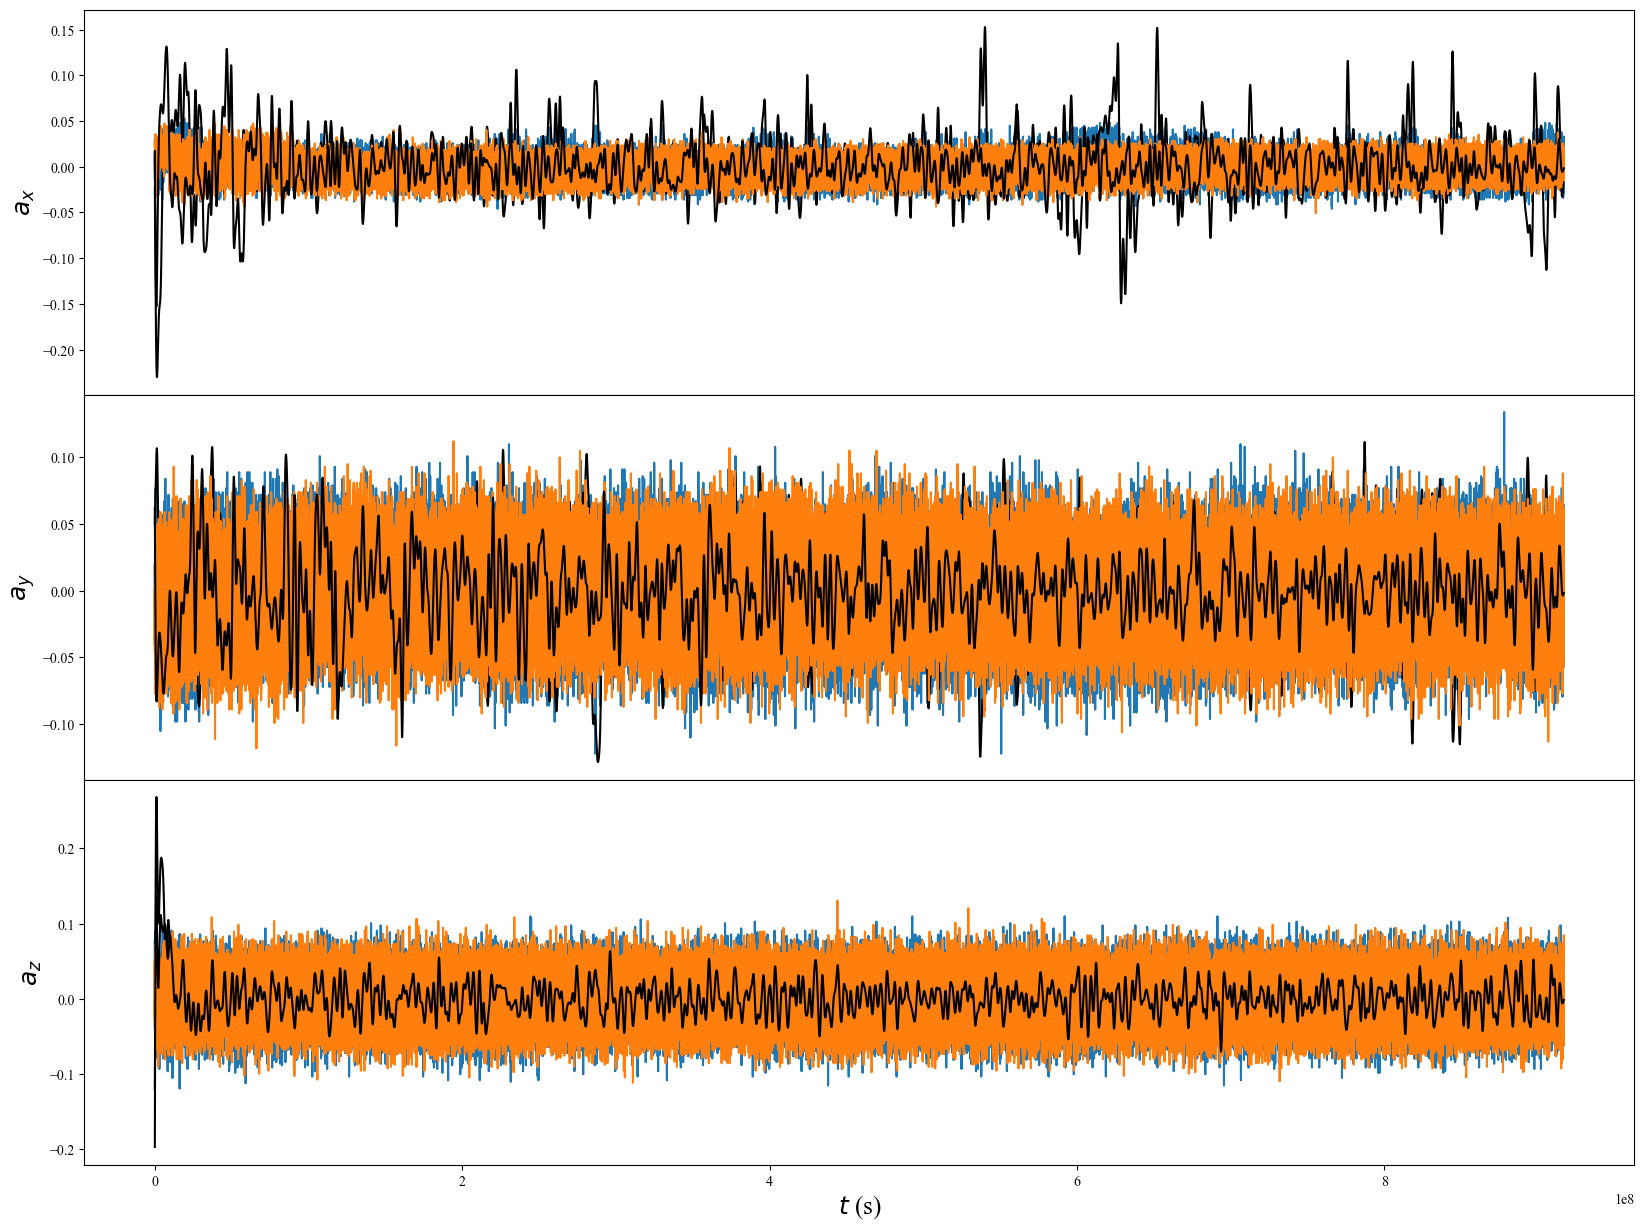

In [132]:
#19h12 UTC
#
line = [58_0,58,0,1738413622.0215788,0.0019006895,1738413622.021405,1738413622.0217085,8.651058798935326e-05,50,1738419220.7759938]

In [138]:
line1 = [0_0,0,0,1738418902.17872,0.0017045665000000002,1738418902.178598,1738418902.1789145,8.235415340473988e-05,50,1738419211.7666726]
print(line1)
line1[3]-line1[-1]

[0, 0, 0, 1738418902.17872, 0.0017045665000000002, 1738418902.178598, 1738418902.1789145, 8.235415340473988e-05, 50, 1738419211.7666726]


-309.58795261383057

In [140]:
Dt = line[-1]-line[3]
print(Dt)

5598.754415035248


In [135]:
import icewave.field.time as timest

t0 = [1738413622.0207553]
timest.display_time(timest.today_time(t0))

line[3]-line[-1]

['07:40:22']

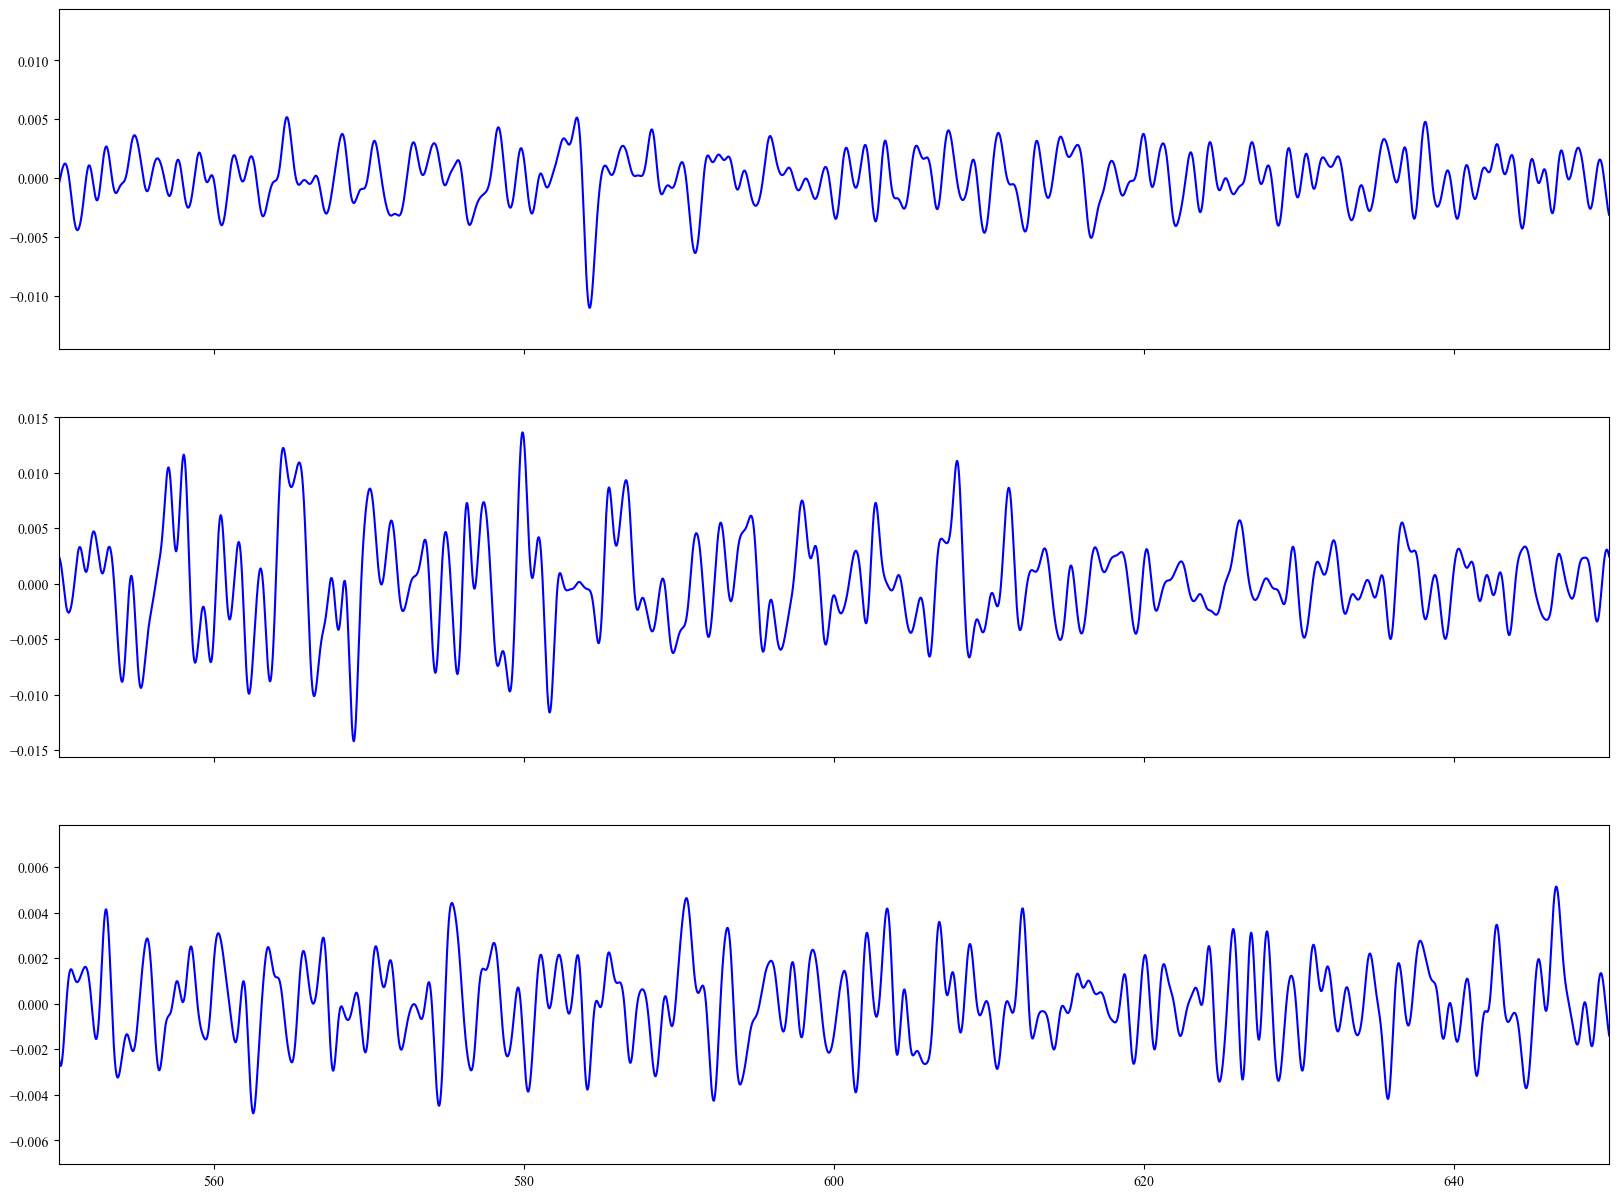

In [123]:
phonelist = [58,59,62]

fig,axs = plt.subplots(figsize=(20,15),nrows=3,sharex=True)


for i,phone in enumerate(phonelist):
    datas = m[phone]
    dic = datas[25]
    ta = np.asarray(dic['ta']).astype(float)
    az = np.asarray(dic['az']).astype(float)
    ax = np.asarray(dic['ax']).astype(float)
    ay = np.asarray(dic['ay']).astype(float)

    t = (ta-ta[0])/10**6
    #plt.plot(t,ax-np.mean(ax),'k-')

    import icewave.phone.analyse as analyse

    y_high,y_wave,y_trend,err = analyse.filtering(ax,fc=0.005,flow=0.0005)

    g=9.81
    axs[i].plot(t,y_wave,'b-')
    #plt.plot(t,y_high,'b-')

    plt.xlim(550,650)

In [124]:
np.std(ax)

0.007212476694686322

In [57]:
analyse.time_spectrum(ta,ax,nt=300)

Number of samples : 1200


(array([0.00000000e+00, 1.43838747e-07, 2.87677494e-07, ...,
        1.93750792e-04, 1.93894631e-04, 1.94038469e-04]),
 array([5.420107  , 5.40387426, 5.33796757, ..., 0.15912128, 0.15571553,
        0.15249032]),
 1.4383874682959443e-06,
 3.449465300488065)

In [36]:

base = '/home/turbots/Documents/Bicwin2025'

date = '0201'
phone = 59
folder = base +f'/Data/{date}/Phone/{phone}/'

filelist = glob.glob(folder+'accelerometer*')
pprint(filelist)

['/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-1-45231831847-46145821871.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-2-46145824409-47059871610.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-3-47059874148-47974560534.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-4-47974563076-48889817696.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-5-48889820239-49805857199.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-6-49805859744-50722506798.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-7-50722509344-51639347871.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-8-51639350418-52556705851.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-9-52556708400-53475309898.pkl',
 '/home/turbots/Documents/Bicwin2025/Data/0201/Phone/59/accelerometer-10-534753124